In [1]:
import tensorflow as tf

In [2]:
X = tf.range(0, 100, 2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [3]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

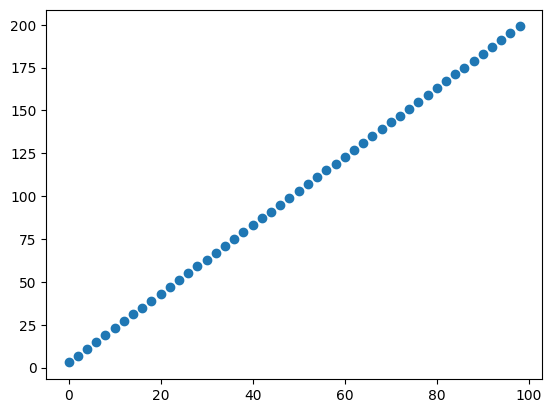

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

# Model Building

In [13]:
# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
              metrics = ['mae']
)

# Train the model
epoch_number = 100
model.fit(X, y, epochs = epoch_number)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 94.5440 - mae: 94.5440 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 59.0369 - mae: 59.0369
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.9492 - mae: 17.9492
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.0399 - mae: 22.0399
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 36.0378 - mae: 36.0378
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 28.1165 - mae: 28.1165
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.6132 - mae: 11.6132
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1032 - mae: 9.1032
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.9257 - mae: 18.9257
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.1517 - mae: 19.1517
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.4374 - mae: 12.4374
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.3673 - mae: 3.3673
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [28]:
import numpy as np

model.predict(np.array([150, -10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[311.48682],
       [-17.38551]], dtype=float32)

# Save Model Using HDF5 Format

In [31]:
model.save('model_2.h5')

# Load Model Using HDF5 Format

In [42]:
import tensorflow as tf
model_2 = tf.keras.models.load_model('model_2.h5')

In [43]:
model_2.predict(np.array([150, -10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[311.48682],
       [-17.38551]], dtype=float32)

In [44]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)